## Name: Dhakshesh T
## Roll. No: CITC1907009

### Importing the Libraries

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np
from collections import Counter
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score,mean_absolute_error

### 1.Load the dataset.

In [22]:
df_initial = pd.read_csv(r"C:\Users\Dhakshesh\Documents\ML\Datasets\mall_customers.csv")

In [23]:
df_initial.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


CustomerID has no effect but is a mere numbering system used to identify the users and hence can be dropped.

In [24]:
df_initial.drop('CustomerID',axis=1,inplace=True)

In [25]:
df_initial

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### 2. Perform Visualisations

#### (i)Univariate Analysis

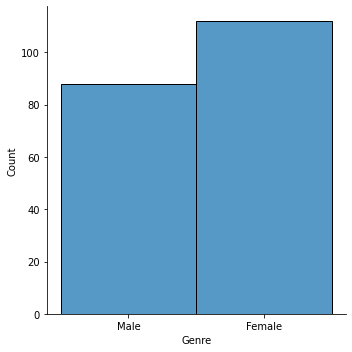

In [9]:
sns.displot(df_initial["Genre"])

<AxesSubplot:xlabel='index', ylabel='Age'>

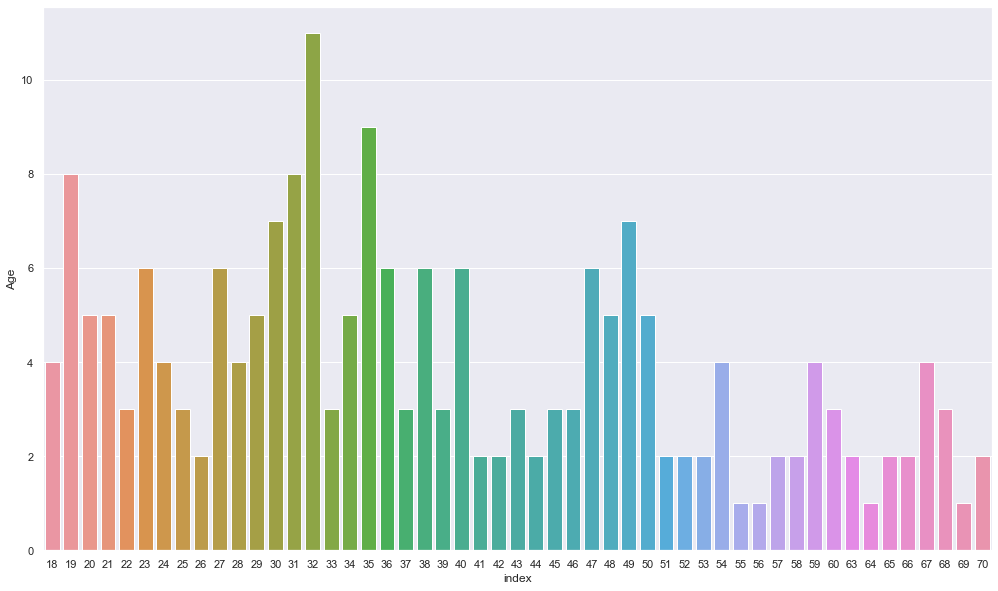

In [12]:
sns.set(rc={'figure.figsize':(17,10)})
depth = df_initial['Age'].value_counts(normalize=False).reset_index()
sns.barplot(data=depth,x='index',y='Age')

<AxesSubplot:ylabel='Genre'>

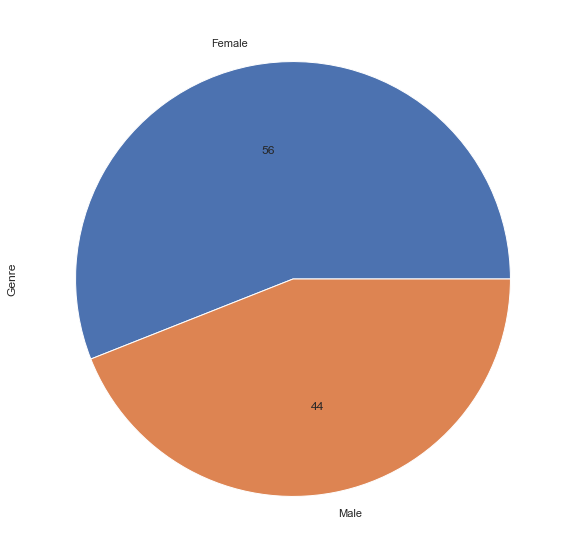

In [14]:
df_initial['Genre'].value_counts().plot(kind='pie',autopct='%.0f')

In [27]:
df_initial.rename(columns = {'Genre':'Gender'}, inplace = True)

In [28]:
df_initial.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


#### (ii) BiVariate Analysis

c:\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

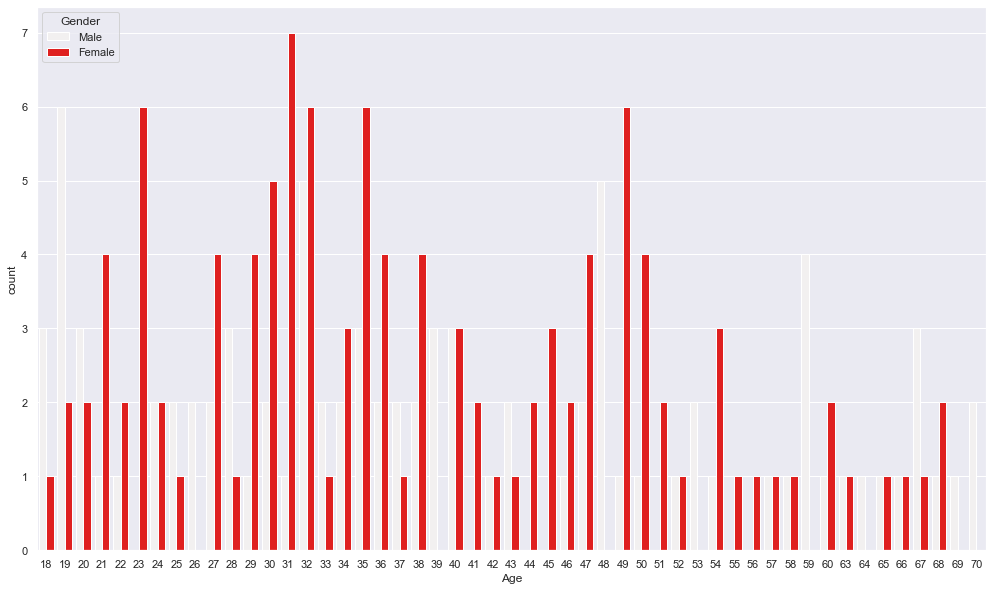

In [33]:
sns.set(rc={'figure.figsize':(17,10)})
sns.countplot(df_initial['Age'] ,hue = df_initial['Gender'] ,color ='red')

Text(0, 0.5, 'Spending Score')

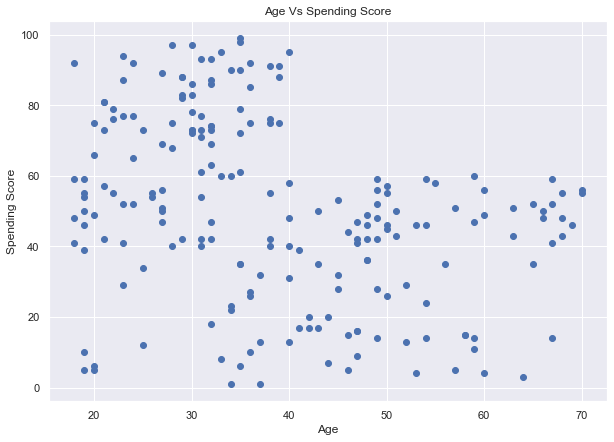

In [35]:
sns.set(rc={'figure.figsize':(10,7)})
plt.scatter(df_initial['Age'], df_initial['Spending Score (1-100)'])
plt.title('Age Vs Spending Score')
plt.xlabel('Age')
plt.ylabel('Spending Score')

#### (iii) MultiVariate Analysis

<Figure size 864x720 with 0 Axes>

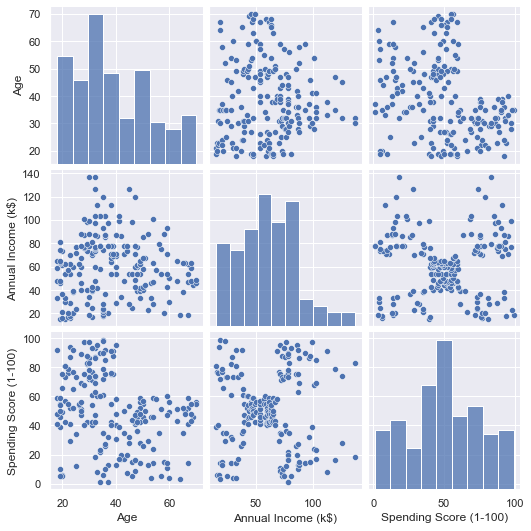

In [36]:
plt.figure(figsize=(12,10))
sns.pairplot(df_initial) 

<AxesSubplot:>

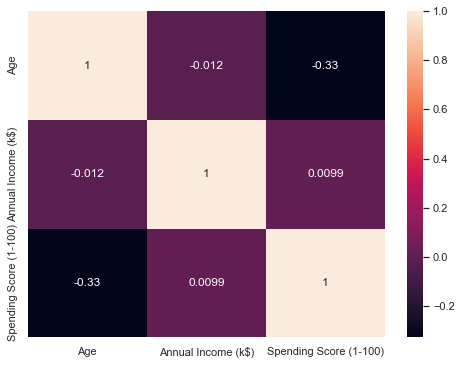

In [37]:
plt.figure(figsize = (8,6))
corr = df_initial.corr()
sns.heatmap(corr, annot = True)

### 4.Descriptive Statistics

In [39]:
def obtain_insights(dataframe,head=5):
    #using series of print statements the insights are obtained
    print(" SHAPE ".center(70,'='))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(70,'='))
    print(dataframe.dtypes)
    print(" MISSING VALUES ".center(70,'='))
    print(dataframe.isnull().sum())
    print(" QUANTILES ".center(70,'='))
    print(dataframe.quantile([0, 0.25, 0.50, 0.75, 1]).T)
    
obtain_insights(df_initial)

=============================== SHAPE ================================
Rows: 200
Columns: 4
=============================== TYPES ================================
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
=========================== MISSING VALUES ===========================
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
============================= QUANTILES ==============================
                        0.00   0.25  0.50  0.75   1.00
Age                     18.0  28.75  36.0  49.0   70.0
Annual Income (k$)      15.0  41.50  61.5  78.0  137.0
Spending Score (1-100)   1.0  34.75  50.0  73.0   99.0


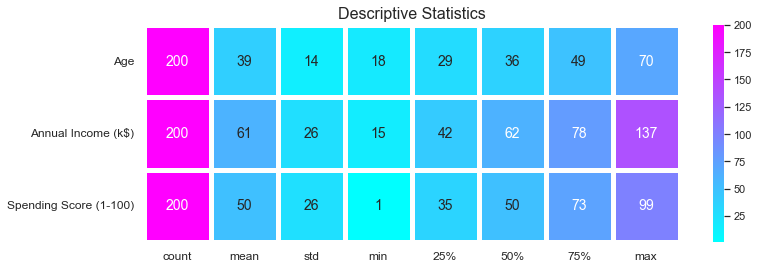

In [40]:
desc = df_initial.describe().T
desc_df = pd.DataFrame(index= [col for col in df_initial.columns if df_initial[col].dtype != 'O'], 
                   columns= ["count","mean","std","min","25%","50%","75%","max"],
                   data= desc )

f,ax = plt.subplots(figsize=(12,4))

sns.heatmap(desc_df, annot=True,cmap = "cool", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = True,
            annot_kws={"size": 14})

plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.title("Descriptive Statistics", size = 16)
plt.show()

### 5.Handle Missing Values

In [62]:
df_initial.isna().sum()

CustomerID                0
Gender                    0
Age                       7
Annual Income (k$)        5
Spending Score (1-100)    0
dtype: int64

It is seen that both the columns containing the missing values are numerical

In [63]:
df_initial['Age'] = df_initial['Age'].fillna(df_initial['Age'].mode()[0])

By using mode() we substitute the most commonest of all the ages in the dataset in place of the missing values.

In [64]:
df_initial['Annual Income (k$)'] = df_initial['Annual Income (k$)'].fillna(df_initial['Annual Income (k$)'].mean())

By using mean() for the Annual Income we substitute the average salary in place of the missing value

In [65]:
df_initial.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### 6. Outlier Detection

In [66]:
#using standard 
def outlier_threshold(dataframe,variable):
    quartile_1 = dataframe[variable].quantile(0.01)
    quartile_3 = dataframe[variable].quantile(0.99)
    iqr = quartile_3-quartile_1
    low_limit = quartile_1 -(1.5*iqr)
    high_limit = quartile_3 +(1.5*iqr)
    return high_limit,low_limit

def replace_thresholds(dataframe,variable):
    high_limit,low_limit = outlier_threshold(dataframe,variable)
    dataframe.loc[(dataframe[variable]<low_limit),variable] = low_limit
    dataframe.loc[(dataframe[variable]>high_limit),variable] = high_limit
    
#using the function
replace_thresholds(df_initial,'Annual Income (k$)')

In [67]:
df_initial

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19.0,15.0,39
1,2,Male,21.0,15.0,81
2,3,Female,20.0,16.0,6
3,4,Female,32.0,16.0,77
4,5,Female,31.0,17.0,40
...,...,...,...,...,...
195,196,Female,35.0,120.0,79
196,197,Female,45.0,126.0,28
197,198,Male,32.0,126.0,74
198,199,Male,32.0,137.0,18


### 7. Categorical Attribute Encoding

In [68]:
le=LabelEncoder()
df_initial['Gender']=le.fit_transform(df_initial['Gender'])

In [71]:
df_initial.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39
1,1,21.0,15.0,81
2,0,20.0,16.0,6
3,0,32.0,16.0,77
4,0,31.0,17.0,40


### 8. Scale Independant Variables

In [73]:
df_scaled = df_initial[["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]]

scaler = StandardScaler()

df_scaled_fit = scaler.fit_transform(df_scaled)

In [75]:
df_scaled_fit = pd.DataFrame(df_scaled_fit)
df_scaled_fit.columns = ["Gender","Age","Annual Income (k$)","Spending Score (1-100)"]
df_scaled_fit.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.128152,-1.430384,-1.765291,-0.434801
1,1.128152,-1.285019,-1.765291,1.195704
2,-0.886405,-1.357702,-1.726613,-1.715913
3,-0.886405,-0.485516,-1.726613,1.040418
4,-0.886405,-0.558199,-1.687935,-0.395980


### 9. Clustering Algorithms

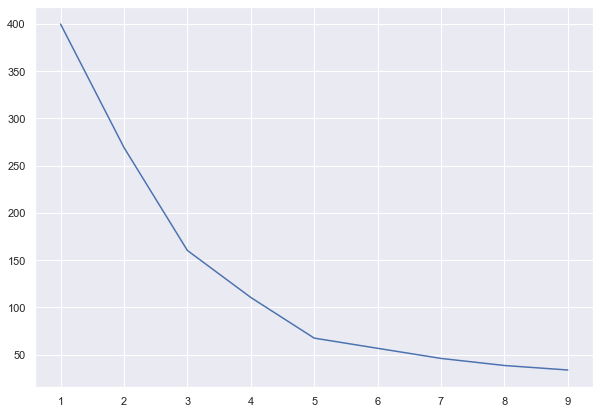

In [81]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    kn = KMeans(n_clusters=k)
    kn.fit(df_scaled_fit[['Spending Score (1-100)','Annual Income (k$)']])
    sse.append(kn.inertia_)
plt.plot(k_rng,sse)

In [84]:
kn = KMeans(n_clusters=5)
y_predicted=kn.fit_predict(df_initial[['Annual Income (k$)','Spending Score (1-100)']])
y_predicted

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

### 10. Add the cluster to the primary dataset

In [85]:
df_transformed = df_initial

In [87]:
df_transformed['class'] = y_predicted

In [88]:
df_transformed

,Gender,Age,Annual Income (k$),Spending Score (1-100),class
0,1,19.0,15.0,39,4
1,1,21.0,15.0,81,3
2,0,20.0,16.0,6,4
3,0,32.0,16.0,77,3
4,0,31.0,17.0,40,4
...,...,...,...,...,...
195,0,35.0,120.0,79,0
196,0,45.0,126.0,28,2
197,1,32.0,126.0,74,0
198,1,32.0,137.0,18,2


### 11.Split Dataset into Predictors and Target

In [90]:
feature =pd.DataFrame(df_transformed.drop(['class'], axis = 1))
label = pd.DataFrame(df_transformed['class'])

In [91]:
feature.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39
1,1,21.0,15.0,81
2,0,20.0,16.0,6
3,0,32.0,16.0,77
4,0,31.0,17.0,40


In [92]:
label.head()

,class
0,4
1,3
2,4
3,3
4,4


### 12. Splitting into training and test datasets.

In [93]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size = 0.2, random_state = 0)

print('X_train : ')
print(X_train)
print(X_train.shape)

print('')
print('X_test : ')
print(X_test)
print(X_test.shape)

print('')
print('y_train : ')
print(y_train)
print(y_train.shape)

print('')
print('y_test : ')
print(y_test)
print(y_test.shape)

X_train : 
     Gender   Age  Annual Income (k$)  Spending Score (1-100)
134       1  20.0                73.0                       5
66        0  43.0                48.0                      50
26        0  45.0                28.0                      32
113       1  19.0                64.0                      46
168       0  36.0                87.0                      27
..      ...   ...                 ...                     ...
67        0  68.0                48.0                      48
192       1  33.0               113.0                       8
117       0  49.0                65.0                      59
47        0  27.0                40.0                      47
172       1  36.0                87.0                      10

[160 rows x 4 columns]
(160, 4)

X_test : 
     Gender   Age  Annual Income (k$)  Spending Score (1-100)
18        1  52.0           60.641026                      29
170       1  40.0           87.000000                      13
107       1  54

### 13. Build the Model.

In [96]:
rfc = RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

In [97]:
clf.fit(X_train, y_train)

print(clf.best_params_)

print(clf.best_score_)

c:\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\python\py

{'max_depth': 12, 'max_features': 1}
0.95625


### 14. Train the Model.

In [99]:
model = RandomForestClassifier(max_depth=12, max_features=1).fit(X_train,y_train)

C:\Users\Dhakshesh\AppData\Local\Temp/ipykernel_37244/1236135951.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier(max_depth=12, max_features=1).fit(X_train,y_train)


### 15. Test the Model

In [100]:
y_pred = model.predict(X_test)

In [101]:
y_pred

array([1, 2, 1, 1, 0, 2, 3, 1, 4, 2, 1, 0, 2, 2, 1, 3, 3, 2, 3, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 4, 4, 1, 2, 1, 4, 0, 0, 1, 1, 1])

### 16. Evalutation Metrics

In [103]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.80      1.00      0.89        12
           2       1.00      0.88      0.93         8
           3       1.00      0.80      0.89         5
           4       1.00      0.80      0.89         5

    accuracy                           0.93        40
   macro avg       0.96      0.89      0.92        40
weighted avg       0.94      0.93      0.93        40



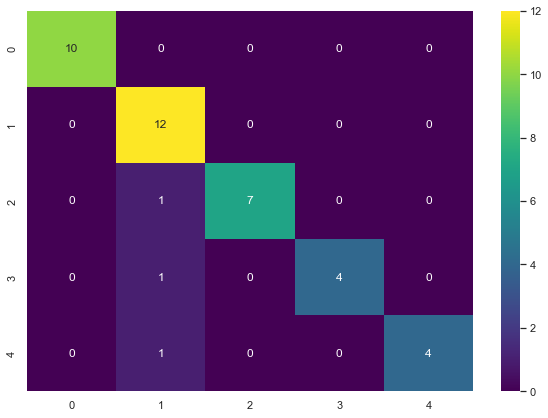

In [104]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='viridis')
print(classification_report(y_test,y_pred))